In [30]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
meta = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_metadata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


장르, 무비 아이디,제목,영화 언어가 영어만 필요해서 따로 드랍해서 만들기기

In [34]:
meta = meta[['id', 'original_title', 'original_language', 'genres']]
meta = meta.rename(columns={'id':'MovieId'})#id를 movieid로 바꿔줌
meta = meta.rename(columns={'original_title':'Title'})#제목을 Title로
meta = meta.rename(columns={'genres':'Genres'})
meta = meta.rename(columns={'original_language':'Language'})#언어를 영어로로
meta.head()

,MovieId,Title,Language,Genres
0,862,Toy Story,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,en,"[{'id': 35, 'name': 'Comedy'}]"


In [35]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MovieId   45466 non-null  object
 1   Title     45466 non-null  object
 2   Language  45455 non-null  object
 3   Genres    45466 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [36]:
meta.Language.value_counts()#영어가 대부분 많이 차지

en       32269
fr        2438
it        1529
ja        1350
de        1080
         ...  
zu           1
qu           1
104.0        1
la           1
si           1
Name: Language, Length: 92, dtype: int64

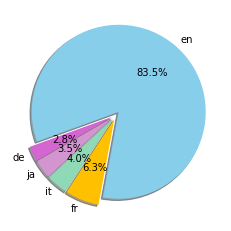

In [37]:
y = [32269, 2438, 1529, 1350, 1080]
x = ['en', 'fr', 'it', 'ja','de']
explode = [0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['skyblue', '#ffc000', '#8fd9b6', '#d395d0', '#d565d0']
plt.pie(y, labels=x, autopct='%.1f%%', startangle=200, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [38]:
meta = meta[meta['Language']=='en']#언어가 영어인 것만 남기기
meta.head()

,MovieId,Title,Language,Genres
0,862,Toy Story,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,en,"[{'id': 35, 'name': 'Comedy'}]"


In [39]:
meta.isnull().sum()

MovieId     0
Title       0
Language    0
Genres      0
dtype: int64

# 영어의 분포 시각화하기:

사용자의 평가 데이터가 너무 커서(2600만개) 스몰평가 데이터를 가져와서 하기로 했음

In [40]:
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ratings_small.csv')

In [41]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [42]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

평가에서는 필요한것이 userid, movieid, rating이다. 그래서 timestamp는 드랍랍

In [43]:
ratings = ratings[['userId', 'movieId', 'rating']]
ratings= ratings.rename(columns={'userId':'UserId'})#id를 movieid로 바꿔줌
ratings = ratings.rename(columns={'movieId':'MovieId'})#제목을 Title로
ratings = ratings.rename(columns={'rating':'Rating'})
ratings.head()

,UserId,MovieId,Rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [44]:
ratings.Rating.value_counts()

4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: Rating, dtype: int64

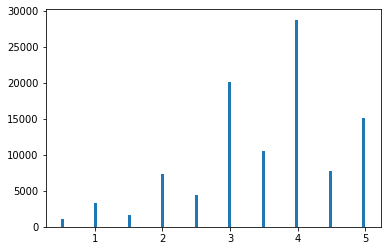

In [45]:
plt.hist(ratings.Rating, bins = 100)
plt.show()

In [46]:
ratings.isnull().sum()

UserId     0
MovieId    0
Rating     0
dtype: int64

In [47]:
ratings.describe()

,UserId,MovieId,Rating
count,100004.000000,100004.000000,100004.000000
mean,347.011310,12548.664363,3.543608
std,195.163838,26369.198969,1.058064
min,1.000000,1.000000,0.500000
25%,182.000000,1028.000000,3.000000
50%,367.000000,2406.500000,4.000000
75%,520.000000,5418.000000,4.000000
max,671.000000,163949.000000,5.000000


rating의 갯수는 약 10만개, 평균값은 3.54, 최소값 0.5, 최대값은 5

meta의 데이터와 rating의 데이터 합치기(공통 값인 movieId를 통해서)
errors: error는 총 3개의 옵션이 존재합니다.

- errors = 'ignore' -> 만약 숫자로 변경할 수 없는 데이터라면 숫자로 변경하지 않고 원본 데이터를 그대로 반환합니다.

- errors = 'coerce' -> 만약 숫자로 변경할 수 없는 데이터라면 기존 데이터를 지우고 NaN으로 설정하여 반환합니다.

- errors = 'raise' -> 만약 숫자로 변경할 수 없는 데이터라면 에러를 일으키며 코드를 중단합니다.

In [48]:
meta.MovieId = pd.to_numeric(meta.MovieId, errors='coerce')
ratings.MovieId = pd.to_numeric(ratings.MovieId, errors='coerce')

# 장르의 데이터의 형태를 문자열로 바꿔준다. 

In [49]:
def parse_genres(genres_str):
    genres = json.loads(genres_str.replace('\'', '"'))
    
    genres_list = []
    for g in genres:
        genres_list.append(g['name'])

    return genres_list

meta['Genres'] = meta['Genres'].apply(parse_genres)

meta.head()

,MovieId,Title,Language,Genres
0,862,Toy Story,en,"[Animation, Comedy, Family]"
1,8844,Jumanji,en,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,en,"[Romance, Comedy]"
3,31357,Waiting to Exhale,en,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,en,[Comedy]


평가데이터와 메타 데이터를 합친다.-> 한 영화에 대한 여러 유저들의 평가를 일일히 나열하려고 inner로 합침침

In [50]:
data = pd.merge(ratings, meta, on='MovieId', how='inner')

data.head()

,UserId,MovieId,Rating,Title,Language,Genres
0,1,1371,2.5,Rocky III,en,[Drama]
1,4,1371,4.0,Rocky III,en,[Drama]
2,7,1371,3.0,Rocky III,en,[Drama]
3,19,1371,4.0,Rocky III,en,[Drama]
4,21,1371,3.0,Rocky III,en,[Drama]


유저가 모든 영화에 대해 평점을 매긴 데이터를 만든다.(이때 NaN은 평가 하지 않았다는 것을 의미한다.)

In [51]:
rating_table = data.pivot_table(index='UserId', columns='Title', values='Rating')

rating_table.head(30)

Title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,12 Angry Men,1408,...,Young and Innocent,Zaat,Zabriskie Point,Zapped Again!,Zardoz,Zodiac,eXistenZ,xXx,¡Three Amigos!,Мой сводный брат Франкенштейн
UserId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pearson Correlation(피어슨 상관관계) 양의 상관관계랑 음의 상관관계를 잘 살펴 보아야 한다.

In [52]:
GENRE_WEIGHT = 0.1

def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))#분자가 클수록 상관관계가 크다.

def recommend(input_movie, rating_table, n, similar_genre=True):
    input_genres = meta[meta['Title'] == input_movie]['Genres'].iloc(0)[0]

    result = []
    for Title in rating_table.columns:#영화 순서대로 돌면서 똑같은 영화를 추천받으면 건너뜀
        if Title == input_movie:
            continue

        # rating comparison
        cor = pearsonR(rating_table[input_movie], rating_table[Title])
        
        # genre comparison
        if similar_genre and len(input_genres) > 0:
            temp_genres = meta[meta['Title'] == Title]['Genres'].iloc(0)[0]

            same_count = np.sum(np.isin(input_genres, temp_genres))
            cor += (GENRE_WEIGHT * same_count)#더해주기기
        
        if np.isnan(cor):#배열을 비교하여 똑같은 요소가 있다면 true를 반환
            continue
        else:
            result.append((Title, '{:.2f}'.format(cor), temp_genres))
            
    result.sort(key=lambda r: r[1], reverse=True)#Rating이 높은 순서대로

    return result[:n]#n개 만큼큼

Prediction

In [53]:
recommend_result = recommend('Rocky III', rating_table, 10, similar_genre=True)

pd.DataFrame(recommend_result, columns = ['Title', 'Correlation', 'Genre'])#데이터프레임으로 보기기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


,Title,Correlation,Genre
0,About Schmidt,0.40,"[Drama, Comedy]"
1,Rocky V,0.40,[Drama]
2,54,0.39,"[Music, Drama]"
3,Michael,0.39,"[Comedy, Drama, Fantasy]"
4,Millennium,0.39,"[Mystery, Drama, Science Fiction, Thriller]"
5,Touch of Evil,0.38,"[Drama, Thriller, Crime]"
6,The House of the Spirits,0.35,"[Romance, Drama]"
7,Midnight in the Garden of Good and Evil,0.33,"[Crime, Drama, Mystery, Thriller]"
8,Population 436,0.33,"[Drama, Horror, Mystery, Thriller]"
9,Porgy and Bess,0.33,"[Music, Drama, Romance]"


In [63]:
recommend_result = recommend('Toy Story', rating_table, 5, similar_genre=True)

pd.DataFrame(recommend_result, columns = ['Title', 'Correlation', 'Genre'])

KeyError: ignored

In [56]:
recommend_result = recommend('The Dark Knight', rating_table, 5, similar_genre=True)

pd.DataFrame(recommend_result, columns = ['Title', 'Correlation', 'Genre'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


,Title,Correlation,Genre
0,Prom Night,0.87,"[Horror, Mystery, Thriller]"
1,Wild Wild West,0.87,"[Action, Adventure, Comedy, Science Fiction, W..."
2,Blue Thunder,0.73,"[Science Fiction, Action, Thriller, Crime, Drama]"
3,Topaz,0.68,"[Action, Drama, Mystery, Thriller]"
4,Yamakasi - Les samouraïs des temps modernes,0.68,"[Action, Crime, Drama]"
